In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for evaluating, split and process data
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# libraries for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
import os
%matplotlib inline
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

# os.getcwd()
# from google.colab import drive 
# drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/udemy-notes

/content/gdrive/My Drive/Colab Notebooks/udemy-notes


In [0]:
# read-in data
df = pd.read_csv('kc_house_data.csv')

In [3]:
# check head of dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# check missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# check summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### EDA

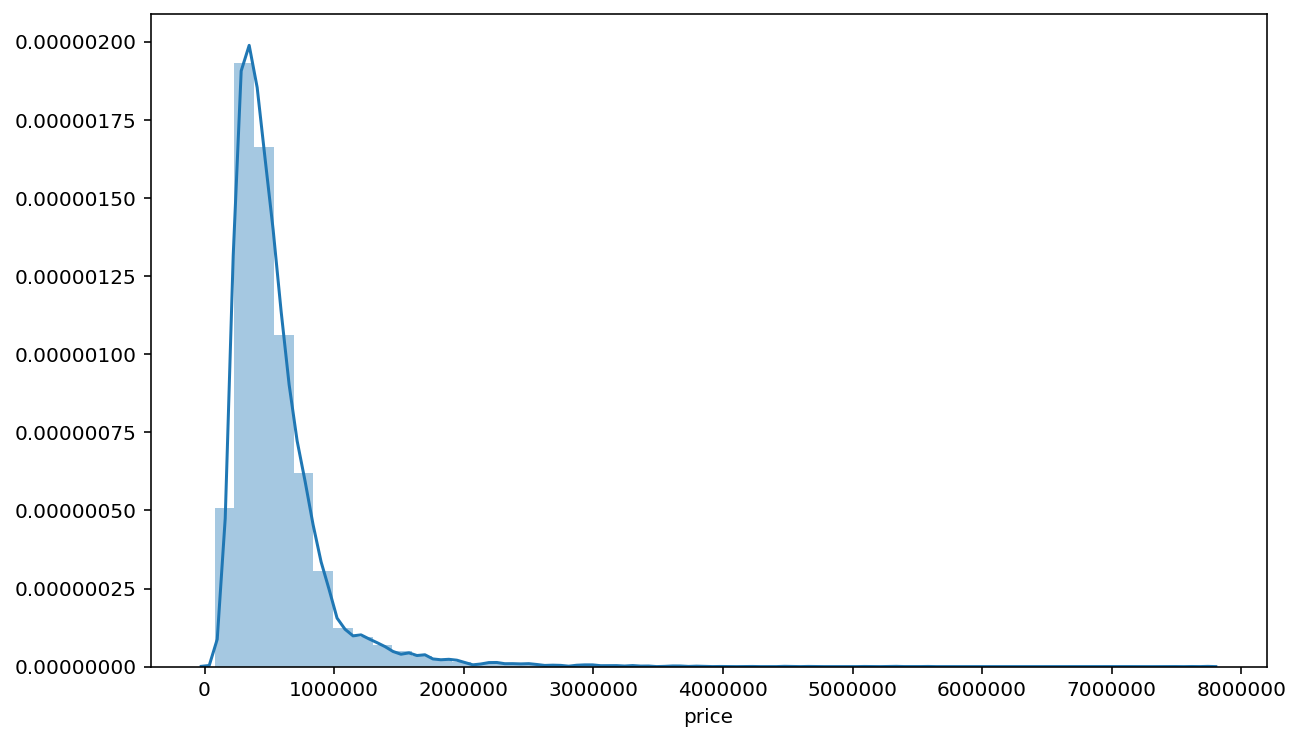

In [6]:
# check distribution of target variable
plt.figure(figsize=(10,6)) 
sns.distplot(df['price'])

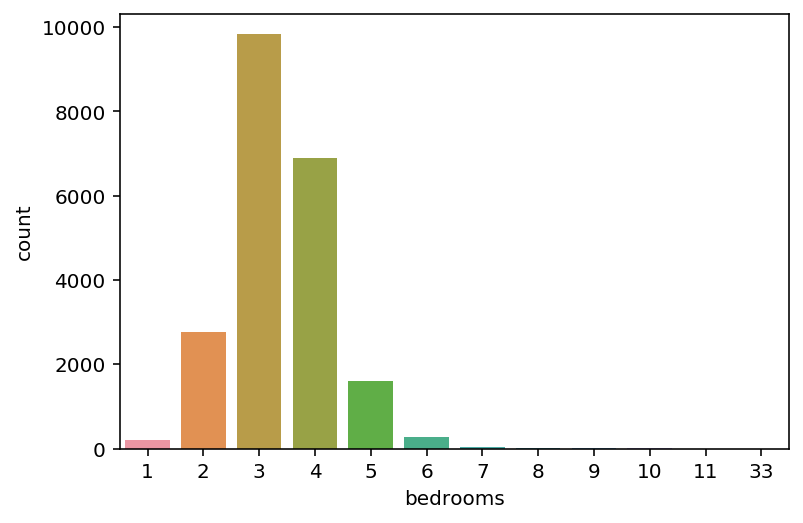

In [7]:
# check distribution of bedrooms
sns.countplot(df['bedrooms'])

In [8]:
# correlation of features
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

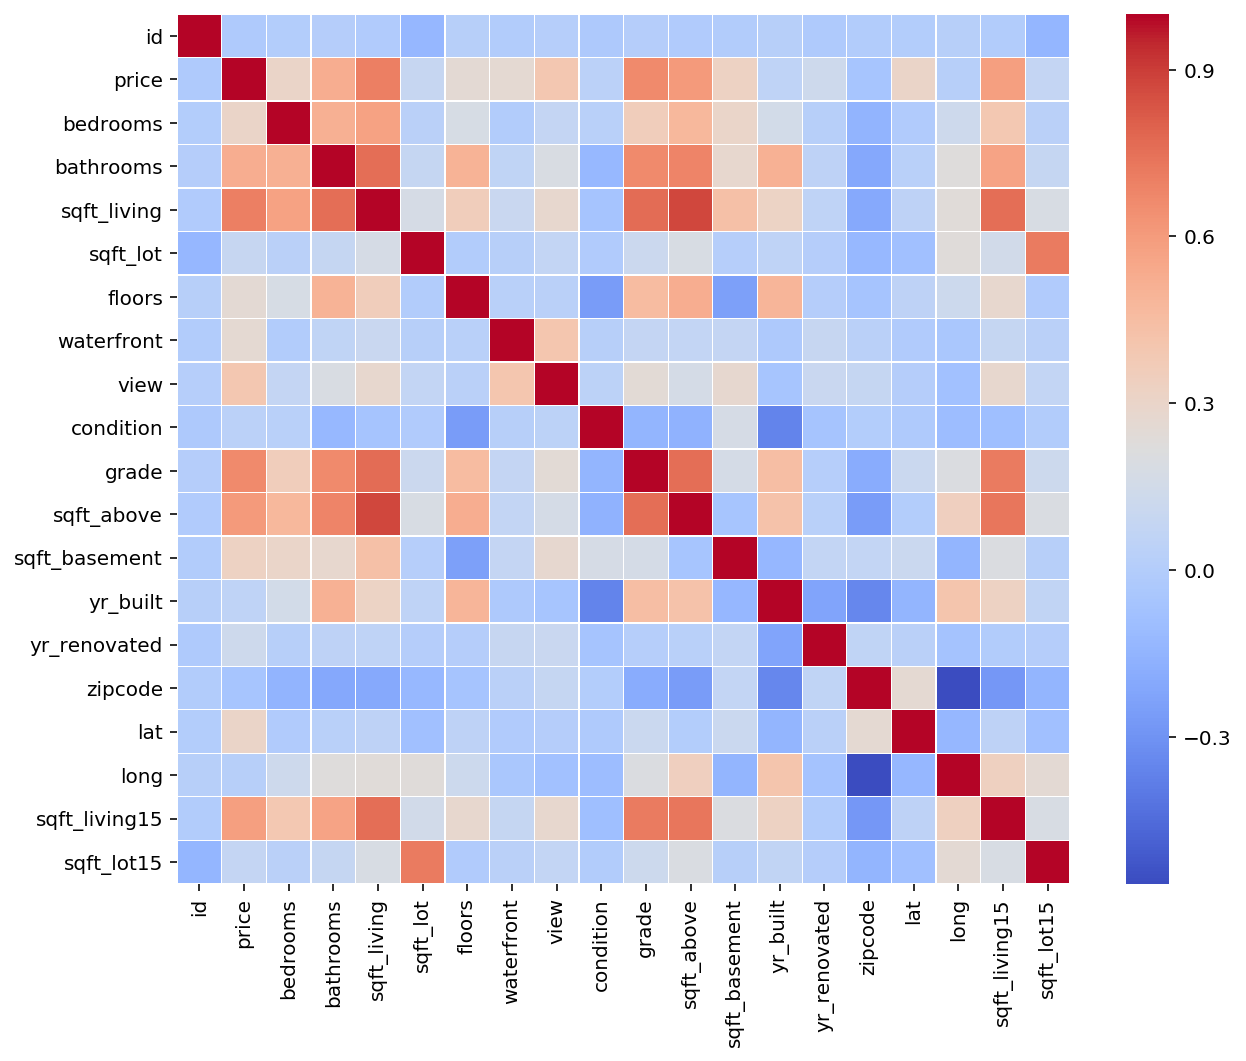

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',linecolor='white',linewidths=0.1);

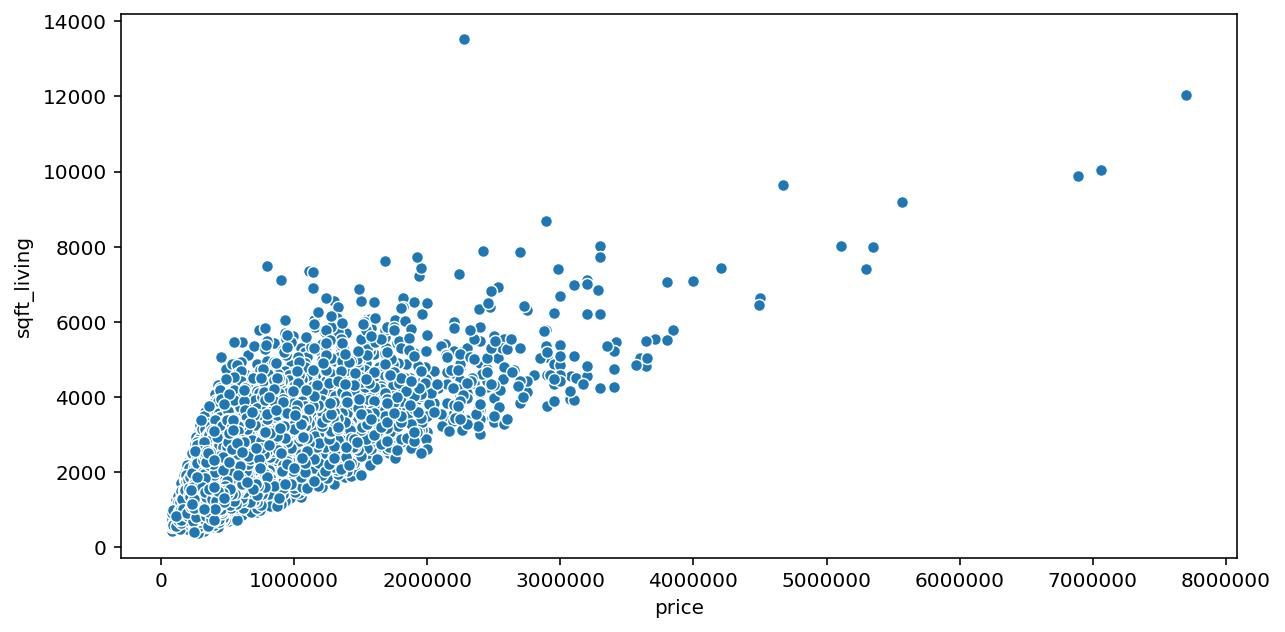

In [10]:
# correlation between price and sqft_living
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

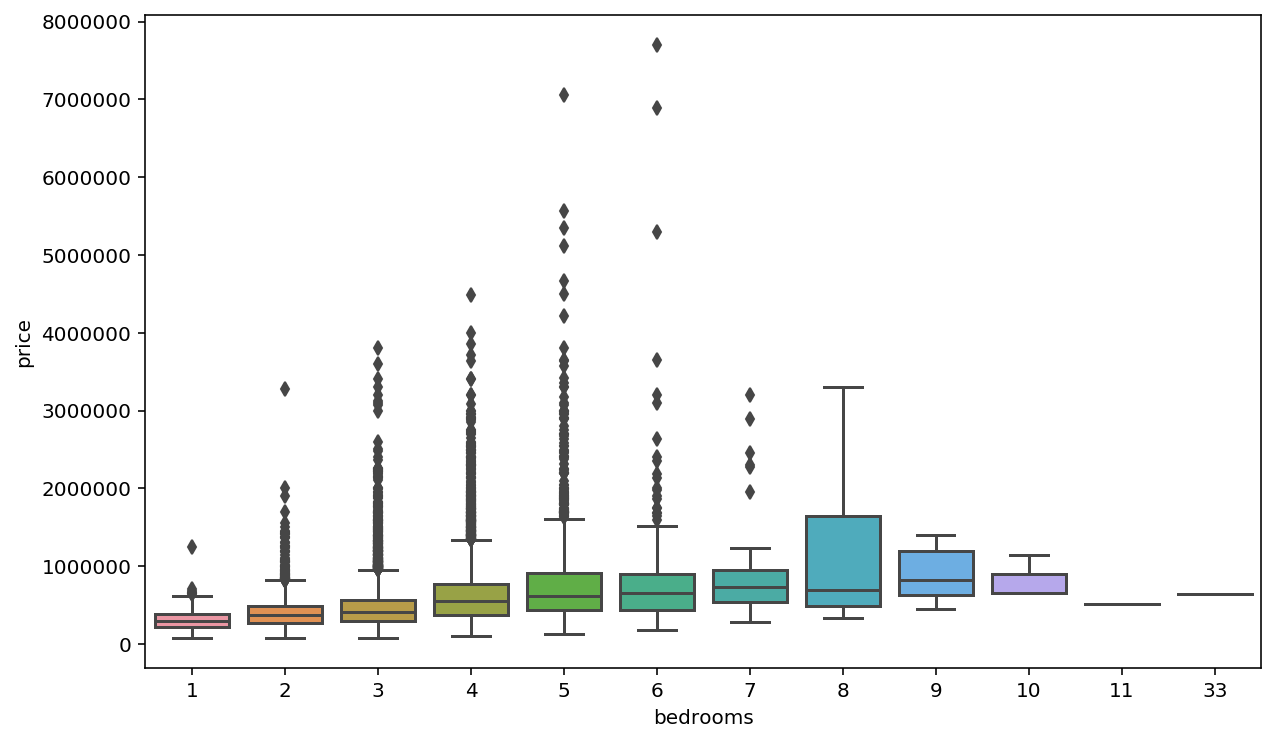

In [11]:
# price in correlation to number of bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

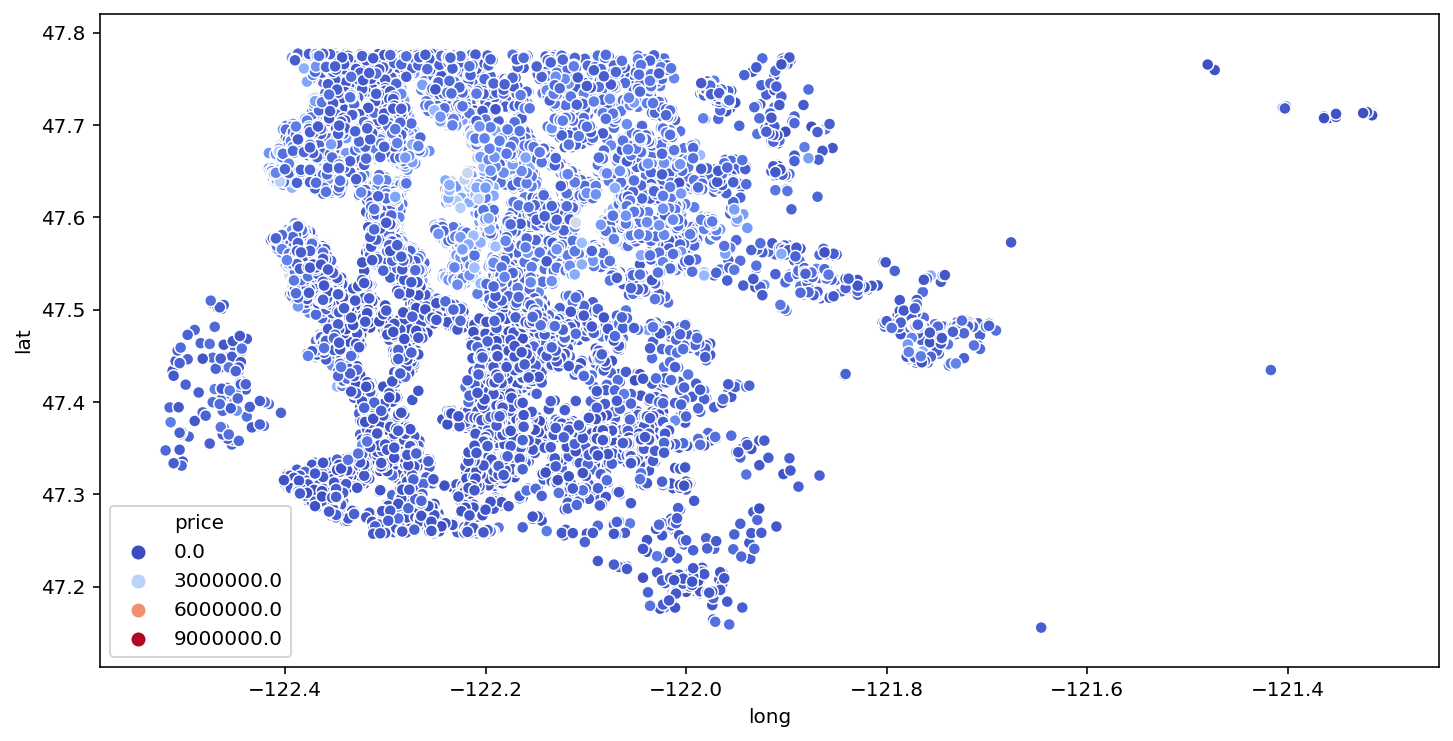

In [12]:
# distribution of prices on lat/long
# see housing prices per area
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='coolwarm')

In [13]:
# top 20 most expensive houses
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


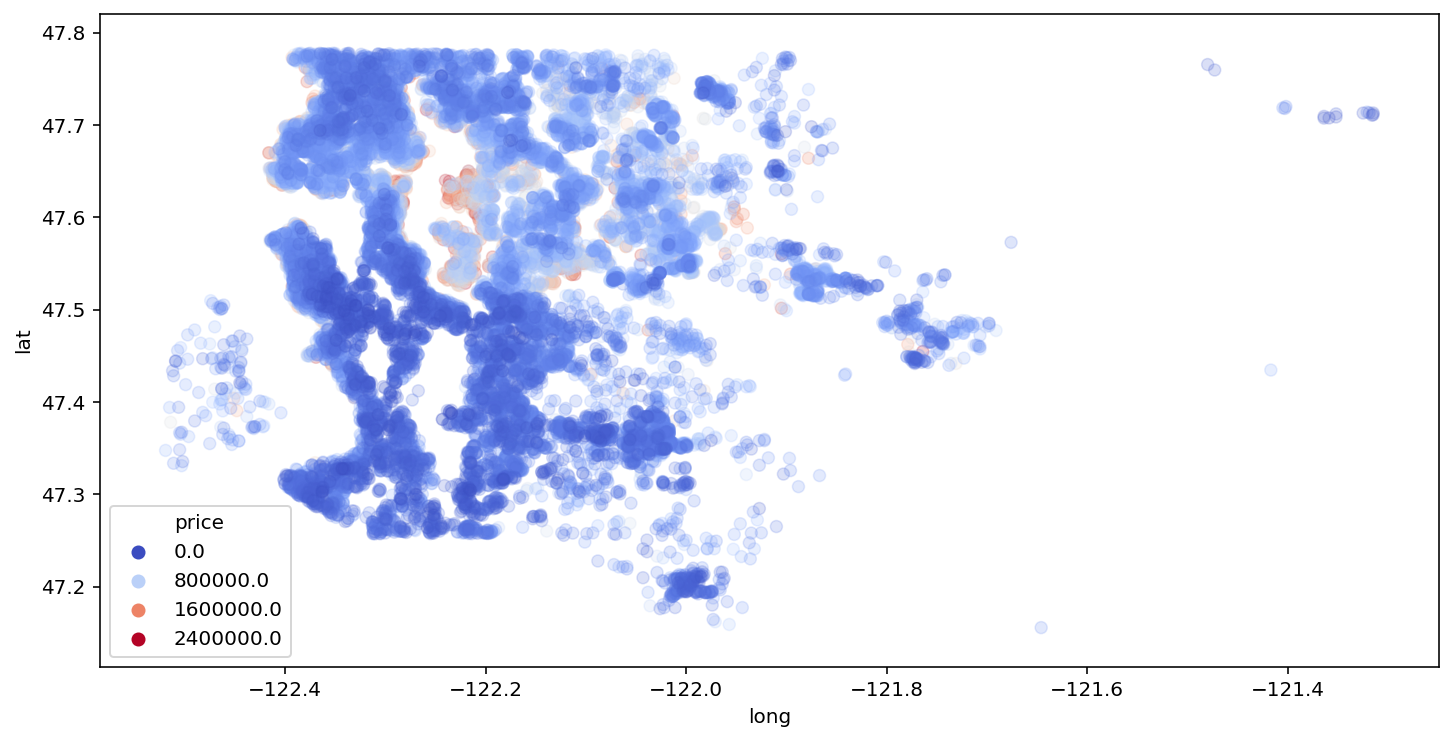

In [14]:
# dropping outliers: all the houses that are at the top 1%
bottom_nn_perc = df.sort_values('price',ascending=False).iloc[216:]
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat',data=bottom_nn_perc,hue='price',palette='coolwarm',edgecolor=None,alpha=0.2)

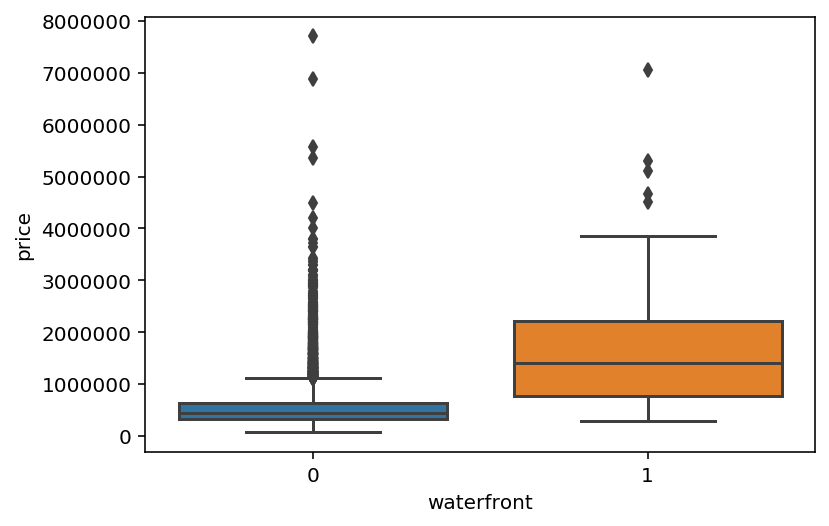

In [15]:
# price in relations to being near water
sns.boxplot(x='waterfront',y='price',data=df)

### Feature Engineering

In [0]:
# get rid of id
df = df.drop('id',axis=1)

# change date dtype
df['date'] = pd.to_datetime(df['date'])

# add month/year columns
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

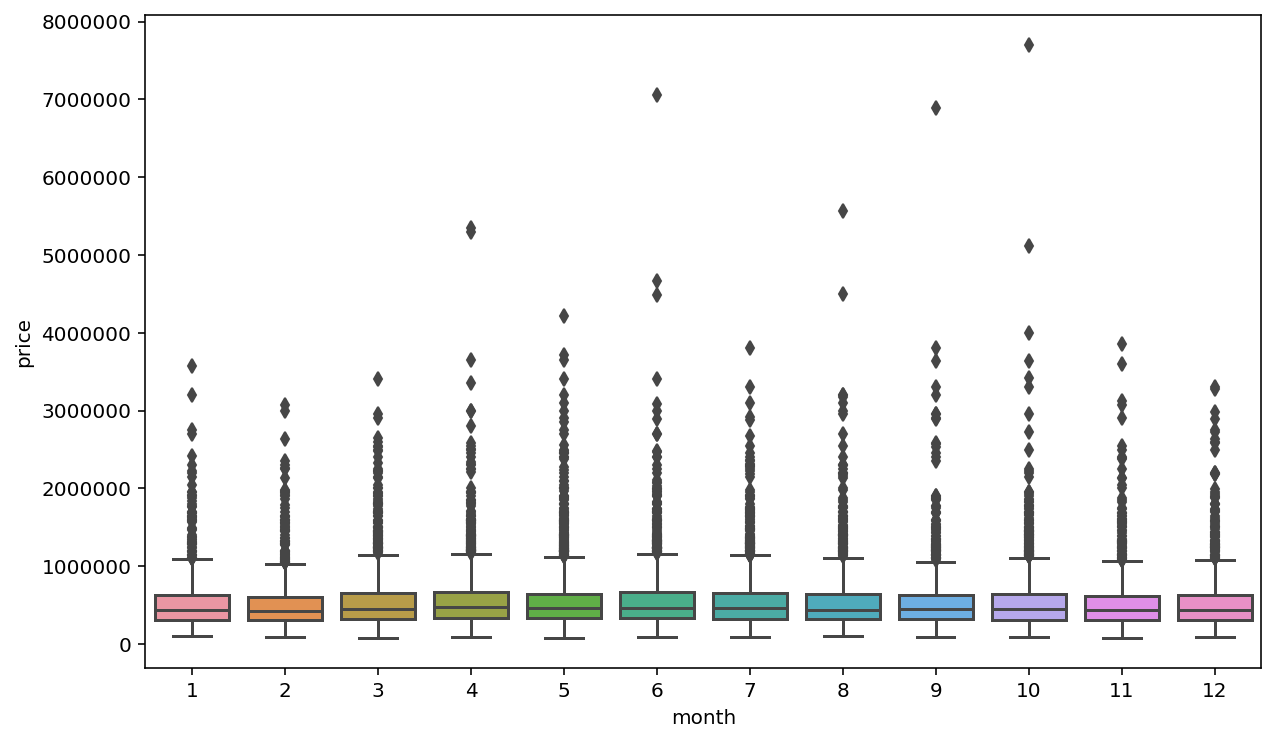

In [17]:
# see how prices vary per months
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

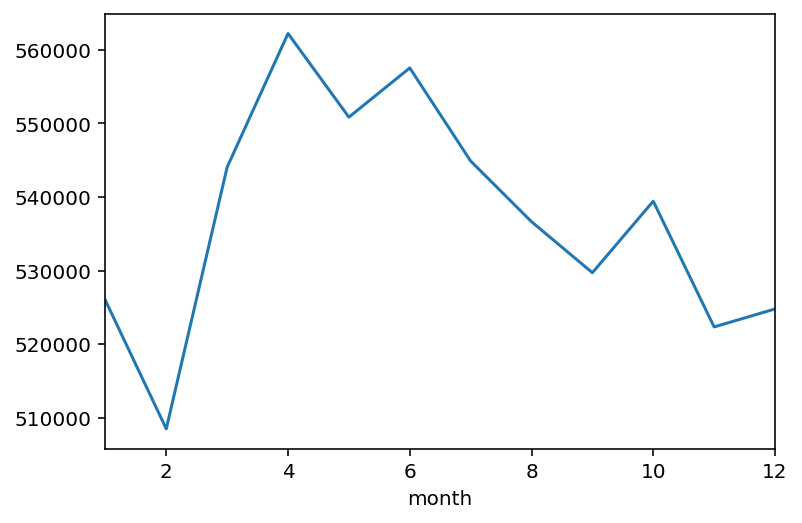

In [18]:
# avg price per month
df.groupby('month').mean()['price'].plot()

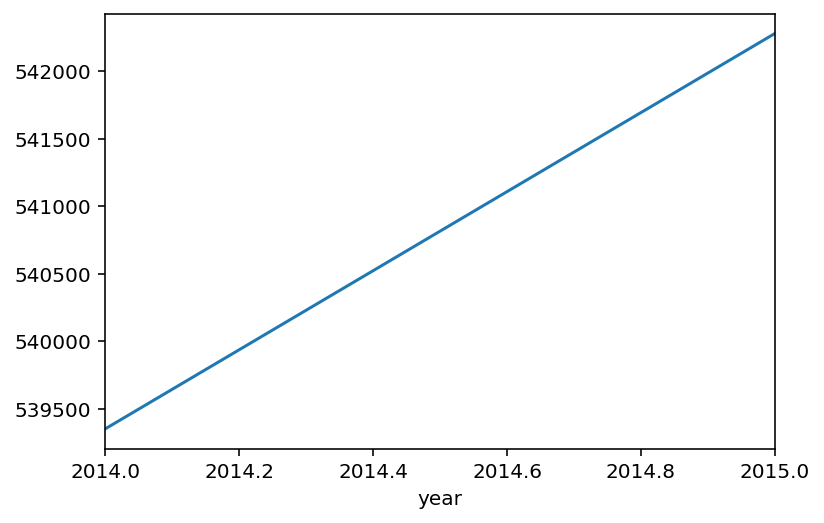

In [19]:
# avg price/year
df.groupby('year').mean()['price'].plot()

In [0]:
# drop date column
df = df.drop('date',axis=1)

In [21]:
# drop zipcode column
# convert to categorical variable
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [0]:
df = df.drop('zipcode',axis=1)

In [23]:
# it might make sense to leave the values as is since the higher the value, 
# the higher the price (since being renovated recently means higher prices).
# we could also potentially categorize this feature as renovated vs not renovated
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
# similar
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [0]:
# getting rid of outliers
# get rid of top 1% of houses that are expensive
bottom99 = df.sort_values(by='price',ascending=False).iloc[175:]['price']
bottom99 = bottom99.index
df = df.iloc[bottom99]

### Data pre-processing and creating model

In [26]:
# separate data X/y
X = df.drop('price',axis=1).values
y = df['price'].values

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# standardize data
scaler = MinMaxScaler()

# fit and transform data
X_train = scaler.fit_transform(X_train)

# note we only transform test set because we do not want to assume knowledge of test set
X_test = scaler.transform(X_test)

# quick look at shape of data
X_train.shape

(14995, 19)

In [0]:
# since there are 19 features, it might be nice to have 19 neurons in the HL

# creating model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# initialize and add layers
model = Sequential()

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output later
model.add(Dense(1,activation='relu'))

model.compile(optimizer='adam',loss='mse')

In [28]:
# fit model
# add validation data for the parameters to compare how we did with the validation set
# feed-in data in batches 64,128,256,...
# smaller the batch size, longer the training and less likely to overfit
model.fit(X_train,y_train,epochs=350,
          validation_data=(X_test,y_test),batch_size=64)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 14995 samples, validate on 6427 samples
Epoch 1/350
14995/14995 [==============================] - 1s 55us/sample - loss: 352320841501.9620 - val_loss: 343550697310.1229
Epoch 2/350
14995/14995 [==============================] - 1s 39us/sample - loss: 161227295252.3844 - val_loss: 57747917454.2001
Epoch 3/350
14995/14995 [==============================] - 1s 37us/sample - loss: 54597336975.8688 - val_loss: 54238437349.2329
Epoch 4/350
14995/14995 [==============================] - 1s 37us/sample - loss: 51179186010.6713 - val_loss: 50723957372.0367
Epoch 5/350
14995/14995 [==============================] - 1s 36us/sample - loss: 47676519270.6902 - val_loss: 47189275279.7934
Epoch 6/350
14995/14995 [==============================] - 1s 36us/sample - loss: 44068512006.5046 - val_loss: 43315320268.9354
Epoch 7/350
14995/14995 [==============================] - 1s 38us/sample - loss: 40370265273.1326 

In [29]:
# get dictionary of model history
pd.DataFrame(model.history.history)

,loss,val_loss
0,3.523208e+11,3.435507e+11
1,1.612273e+11,5.774792e+10
2,5.459734e+10,5.423844e+10
3,5.117919e+10,5.072396e+10
4,4.767652e+10,4.718928e+10
...,...,...
345,2.012569e+10,2.011925e+10
346,2.010294e+10,2.011445e+10
347,2.009214e+10,1.991512e+10
348,2.013223e+10,1.991111e+10


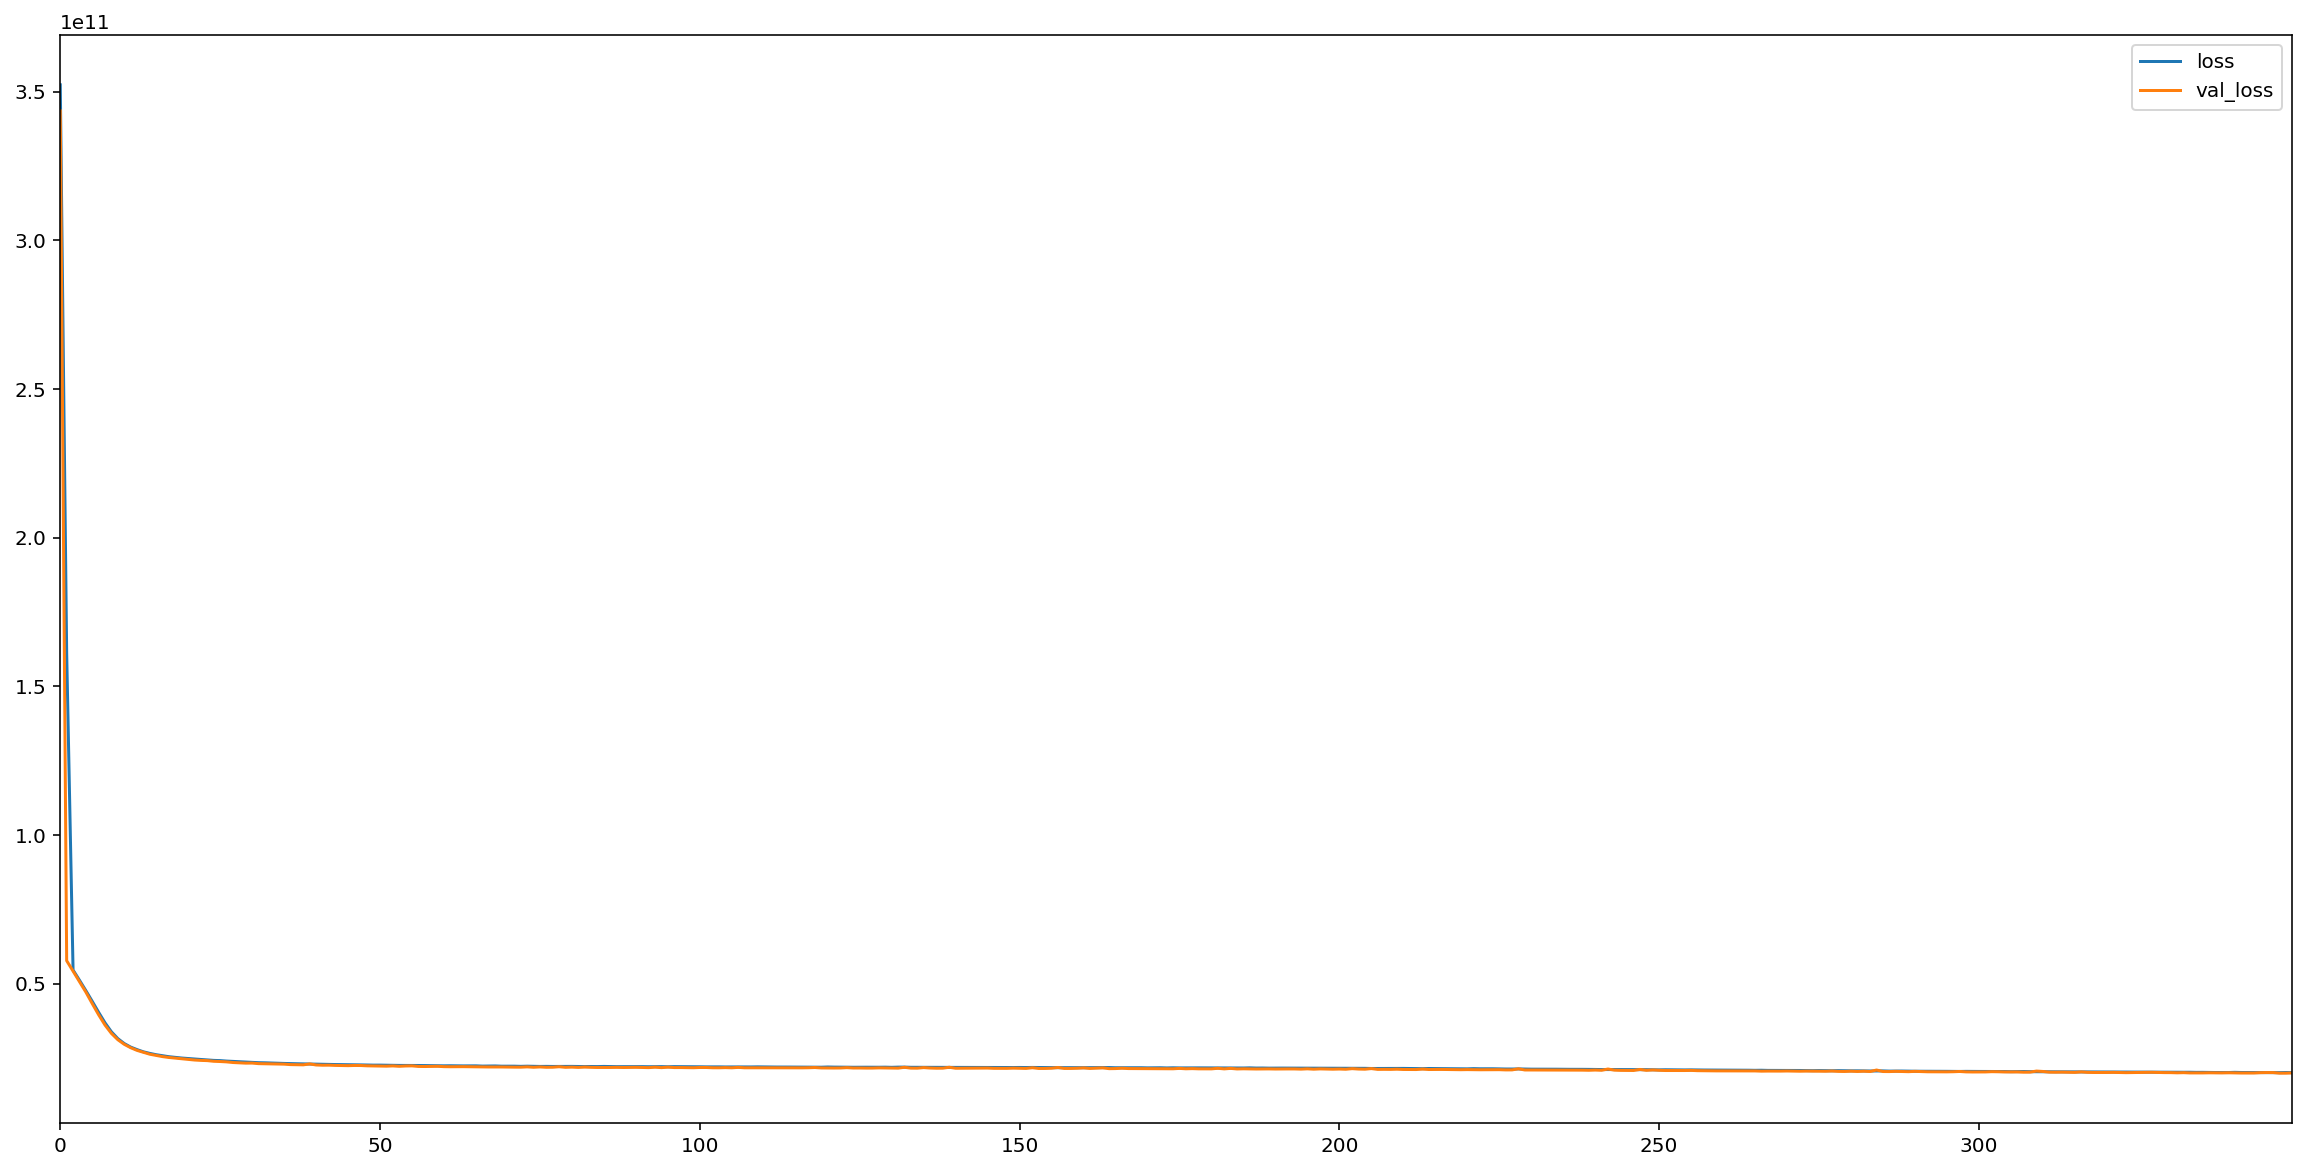

In [30]:
# plot to see if we are overfitting data
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(20,10))

In [0]:
# make prediction
predictions = model.predict(X_test)

In [32]:
# get mse
mean_squared_error(y_test,predictions)

20002278652.9154

In [33]:
# get rmse
np.sqrt(mean_squared_error(y_test,predictions))

141429.41226249724

In [34]:
# get mae
mean_absolute_error(y_test,predictions)

94880.73653264547

In [35]:
# check if this is a good result
df['price'].describe()

count    2.142200e+04
mean     5.213115e+05
std      2.925166e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.370000e+05
max      2.180000e+06
Name: price, dtype: float64

In [36]:
# deeper understanding
# best possible value is 1.0, the lower the value, the worse 
# explained variance score is how much variance is explained by your model
explained_variance_score(y_test,predictions)

0.7695655499137715

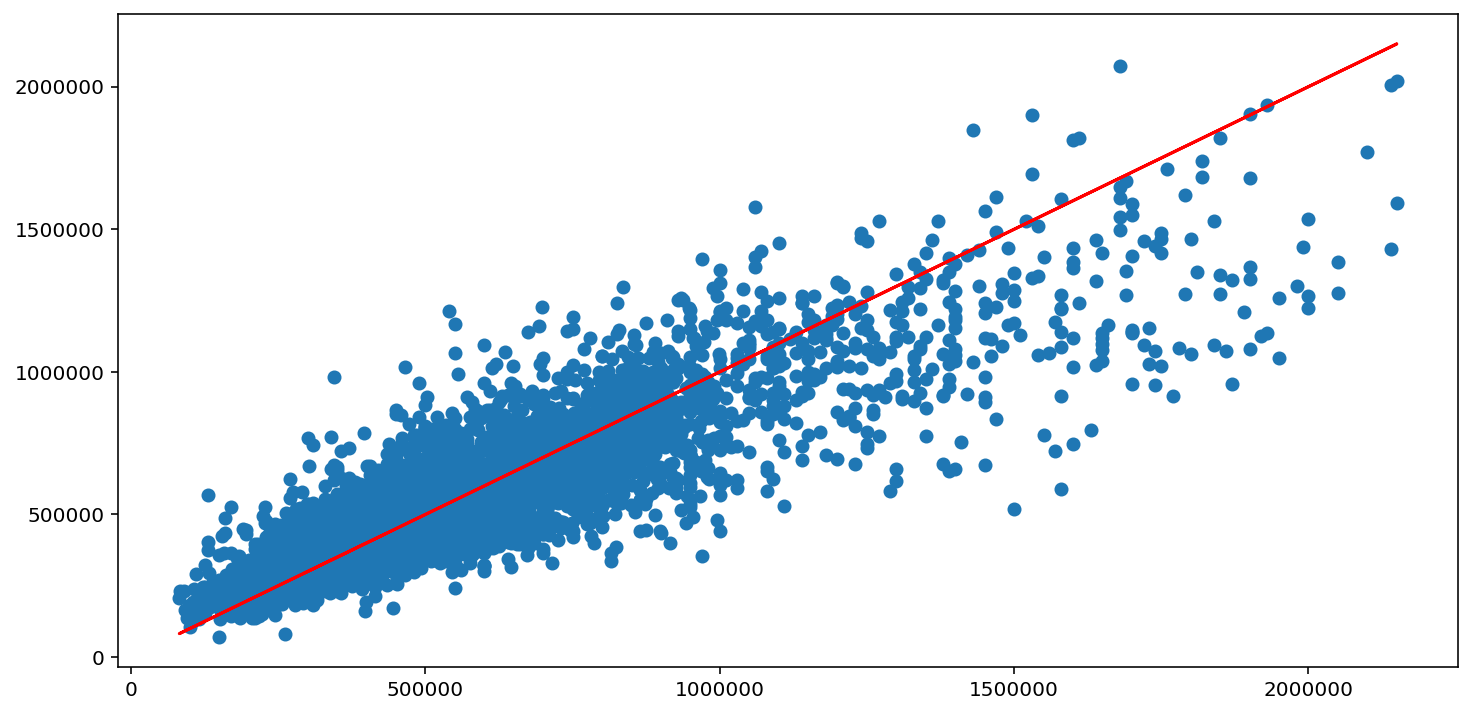

In [37]:
# compare predictions with a perfect fit
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [0]:
# let's try to predict price of a brand new house
# grab the random house from index, say 11112
new_house = df.drop('price',axis=1).iloc[11112]
# reshape array into matrix
# -1 means that keep old dimensions along that axis
single_house = scaler.transform(new_house.values.reshape(-1,19))

In [46]:
# predict price
model.predict(single_house)

array([[454028.84]], dtype=float32)

In [47]:
# actual price
df.iloc[11112]['price']

440000.0

We see that what we predicted was very close to the actual price!